#문제 정의
코로나 19로 인해 사회 많은 영역에서 사회적, 경제적 피해를 받고 있다. 

코로나 확진자 수에 따른 따릉이 대여건수를 예측해보고, 더 나아가 확진자 수와 한강 방문자 수에 따른 따릉이 대여건수를 예측해봄으로써 사람들이 코로나 확진자 수에 따라 만남 혹은 한강 방문에 영향을 받는지 알아본다.

확진자 수에 따라 영향을 받는다면 매일 확진자수는 실시간으로 집계되고, 전날 하루의 통계치가 매 12시 정각에 발표되니 다음날 따릉이 대여건수를 예측하여 유연하게 대여소와 자전거 고치는 시기를 조정하여 운영할 수 있을 것으로 예상된다.

=> 사용한 데이터셋 [ 출처 : 서울 열린데이터 광장 ]


*   서울특별시 공공자전거 이용정보(시간대별) / 2020년 7-11월
*   서울특별시 공공자전거 대여소 정보
*   서울특별시 코로나19 자치구별 확진자 발생동향
*   서울특별시 코로나19 확진자 발생동향



#분류? 회귀?
회귀 문제로 접근했다. 

확진자와 다른 요소들에 따른 대여건수 즉, 숫자 예측이기 때문에 회귀 문제로 접근하는 것이 맞다고 생각함.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ai_04/따릉이+확진자.csv")
#요일은 월 : 0..~
df.head()

,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,날짜,서울시 확진자,서울시 추가 확진,요일
0,0,1643,1643. 태릉입구역 8번출구,정기권,F,~10대,1,0.00,0.00,0.00,12,2020-07-01,1321,9,2
1,0,1689,1689. 마들역 3번출구,정기권,F,~10대,1,0.00,0.00,0.00,6,2020-07-01,1321,9,2
2,0,574,574. 아차산역4번출구,정기권,F,~10대,1,0.00,0.00,0.00,7,2020-07-01,1321,9,2
3,0,1127,1127. 화곡역(에이스정형외과앞) 버스정류장,정기권,F,~10대,1,52.83,0.54,2340.57,16,2020-07-01,1321,9,2
4,0,1327,1327. 상월곡역 3번출구,정기권,F,~10대,1,0.00,0.00,0.00,16,2020-07-01,1321,9,2


In [2]:
df.drop(df[df['대여구분코드']=='단기권(전기)'].index, inplace=True)
df.drop(df[df['대여구분코드']=='일일권(비회원)'].index, inplace=True)

In [3]:
df.shape  #(5141396, 15)

(5141396, 15)

In [4]:
rent = pd.read_csv('/content/drive/MyDrive/ai_04/공공자전거 대여소 정보(21.01.31 기준) (1).csv', encoding='cp949')
rent.columns = ['대여소번호','보관소(대여소)명','소재지(자치구)','상세주소','위도','경도','설치시기','거치대수(LCD)','거치대수(QR)','운영방식']
rent.drop(index=[0,1,2,3],inplace=True)
rent = rent[['대여소번호','소재지(자치구)']]
rent = rent.dropna()
rent.head()

,대여소번호,소재지(자치구)
4,301.0,종로구
5,302.0,종로구
6,303.0,종로구
7,304.0,종로구
8,305.0,종로구


In [5]:
rent['대여소번호'] = rent['대여소번호'].astype(int)

In [29]:
rent.dtypes

대여소번호        int64
소재지(자치구)    object
dtype: object

In [6]:
df = df.merge(rent, how='left',on=['대여소번호'])
print(df.shape)
df.head()

(5152904, 16)


,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,날짜,서울시 확진자,서울시 추가 확진,요일,소재지(자치구)
0,0,1643,1643. 태릉입구역 8번출구,정기권,F,~10대,1,0.00,0.00,0.00,12,2020-07-01,1321,9,2,노원구
1,0,1689,1689. 마들역 3번출구,정기권,F,~10대,1,0.00,0.00,0.00,6,2020-07-01,1321,9,2,노원구
2,0,574,574. 아차산역4번출구,정기권,F,~10대,1,0.00,0.00,0.00,7,2020-07-01,1321,9,2,광진구
3,0,1127,1127. 화곡역(에이스정형외과앞) 버스정류장,정기권,F,~10대,1,52.83,0.54,2340.57,16,2020-07-01,1321,9,2,강서구
4,0,1327,1327. 상월곡역 3번출구,정기권,F,~10대,1,0.00,0.00,0.00,16,2020-07-01,1321,9,2,성북구


In [7]:
df.dropna(inplace=True)


##데이터 설명 
*   대여 시간 : 몇시에 빌렸는가
*   사용 시간 : 얼마나 사용했는가
*   이용 건수 : 몇번을 사용했는가



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text

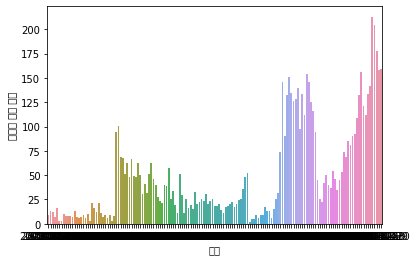

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.barplot(
    data = df,
    x="날짜",
    y="서울시 추가 확진"
)

In [10]:
cols = ['날짜','요일','소재지(자치구)','대여시간','대여구분코드','서울시 추가 확진']  #'서울시 확진자', 

df_1 = df.groupby(cols)['이용건수'].sum().reset_index()
df_1.head()

,날짜,요일,소재지(자치구),대여시간,대여구분코드,서울시 추가 확진,이용건수
0,2020-07-01,2,강남구,0,일일권,9,3
1,2020-07-01,2,강남구,0,정기권,9,22
2,2020-07-01,2,강남구,1,일일권,9,6
3,2020-07-01,2,강남구,1,정기권,9,20
4,2020-07-01,2,강남구,2,일일권,9,3


원핫인코딩

In [ ]:
df_1['대여구분코드'].value_counts()

정기권    89959
일일권    82058
단체권    16754
Name: 대여구분코드, dtype: int64

In [11]:
df_onehot = pd.get_dummies(data = df_1, columns = ['대여구분코드','요일','소재지(자치구)'], prefix = ['대여구분코드','요일','소재지(자치구)'])
df_onehot.head()

,날짜,대여시간,서울시 추가 확진,이용건수,대여구분코드_단체권,대여구분코드_일일권,대여구분코드_정기권,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6,소재지(자치구)_강남구,소재지(자치구)_강동구,소재지(자치구)_강북구,소재지(자치구)_강서구,소재지(자치구)_관악구,소재지(자치구)_광진구,소재지(자치구)_구로구,소재지(자치구)_금천구,소재지(자치구)_노원구,소재지(자치구)_도봉구,소재지(자치구)_동대문구,소재지(자치구)_동작구,소재지(자치구)_마포구,소재지(자치구)_서대문구,소재지(자치구)_서초구,소재지(자치구)_성동구,소재지(자치구)_성북구,소재지(자치구)_송파구,소재지(자치구)_양천구,소재지(자치구)_영등포구,소재지(자치구)_용산구,소재지(자치구)_은평구,소재지(자치구)_종로구,소재지(자치구)_중구,소재지(자치구)_중랑구
0,2020-07-01,0,9,3,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-07-01,0,9,22,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-07-01,1,9,6,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-07-01,1,9,20,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-07-01,2,9,3,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


시각화

In [12]:
df_1.head()

,날짜,요일,소재지(자치구),대여시간,대여구분코드,서울시 추가 확진,이용건수
0,2020-07-01,2,강남구,0,일일권,9,3
1,2020-07-01,2,강남구,0,정기권,9,22
2,2020-07-01,2,강남구,1,일일권,9,6
3,2020-07-01,2,강남구,1,정기권,9,20
4,2020-07-01,2,강남구,2,일일권,9,3


In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,434 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and d

In [11]:
from matplotlib import pyplot as plt
plt.rc('font', family='NanumBarunGothic') # 폰트 설정
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

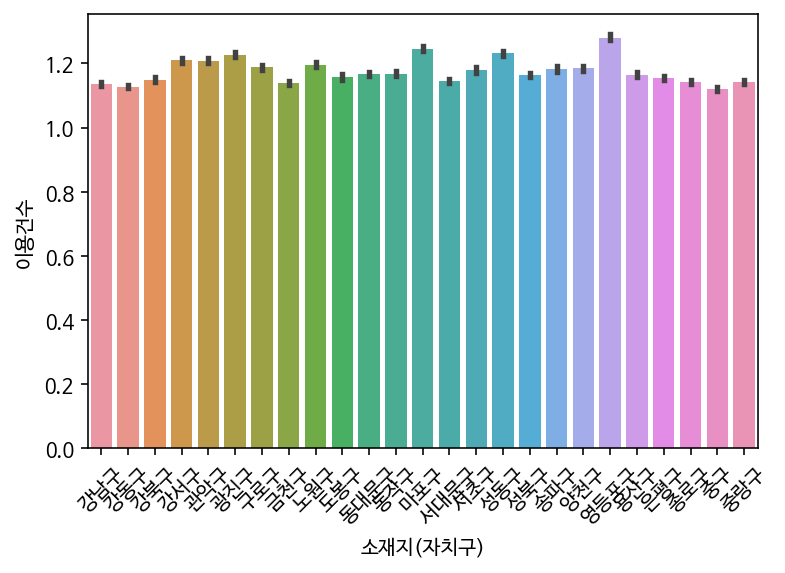

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.barplot(
    data= df_1,
    x= "소재지(자치구)",
    y= "이용건수"
)

plt.xticks(rotation = 45 )
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()

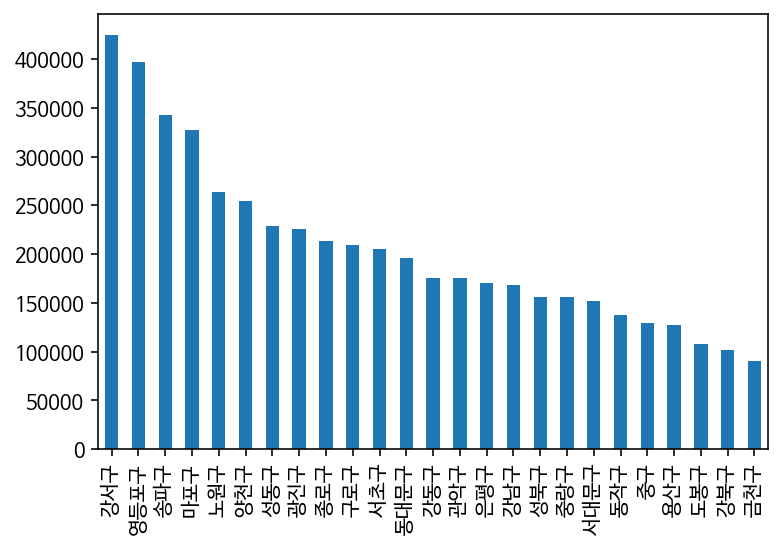

In [12]:
from matplotlib import pyplot as plt
g = df['소재지(자치구)'].value_counts().sort_values(ascending=False)
g.plot.bar()

어느 모델이 성능이 좋은지 확인하기 위해 모든 데이터를 사용하기에는 너무 많은 시간이 걸림. 

이용건수도 가장 많고, 대여수도 가장 많은 강서구의 데이터로 학습 후, 모든 자치구에 적용할 예정


In [13]:
df_gangseo = df_1[df_1['소재지(자치구)']=='강서구']
print(df_gangseo.shape)
df_gangseo.head() #(8031, 7)

(8031, 7)


,날짜,요일,소재지(자치구),대여시간,대여구분코드,서울시 추가 확진,이용건수
148,2020-07-01,2,강서구,0,일일권,9,12
149,2020-07-01,2,강서구,0,정기권,9,46
150,2020-07-01,2,강서구,1,일일권,9,9
151,2020-07-01,2,강서구,1,정기권,9,30
152,2020-07-01,2,강서구,2,정기권,9,12


In [14]:
df_gangseo_onehot = pd.get_dummies(data = df_gangseo, columns = ['대여구분코드','요일'], prefix = ['대여구분코드','요일'])
print(df_gangseo_onehot.shape)
df_gangseo_onehot.head()

(8031, 15)


,날짜,소재지(자치구),대여시간,서울시 추가 확진,이용건수,대여구분코드_단체권,대여구분코드_일일권,대여구분코드_정기권,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6
148,2020-07-01,강서구,0,9,12,0,1,0,0,0,1,0,0,0,0
149,2020-07-01,강서구,0,9,46,0,0,1,0,0,1,0,0,0,0
150,2020-07-01,강서구,1,9,9,0,1,0,0,0,1,0,0,0,0
151,2020-07-01,강서구,1,9,30,0,0,1,0,0,1,0,0,0,0
152,2020-07-01,강서구,2,9,12,0,0,1,0,0,1,0,0,0,0


Train, validation, Test data Split

In [15]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_gangseo_onehot, test_size=0.2, random_state=2)
train.shape,test.shape

((6424, 15), (1607, 15))

In [16]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=2)
train.shape, val.shape,test.shape

((5139, 15), (1285, 15), (1607, 15))

In [17]:
target = '이용건수'
features = df_gangseo_onehot.drop(columns=[target,'날짜','소재지(자치구)']).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

#기준 모델 (Baseline)
기준 모델은 이용건수의 평균으로 하였다. 

확진자 수에 따른 이용건수를 예측하는 것이니 이용 건수의 평균을 기본적인 기준 모델로 설정하는 것이 좋겠다고 생각했다.

In [18]:
baseline = df_1['이용건수'].mean()
y_base = [baseline] * len(y_train)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_train, y_base)
print(f'기준모델 MAE : {mae:.2f}')

기준모델 MAE : 50.98


선형회귀

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
print(f'훈련 에러: {mae:.2f}')

# 검증 모델 MAE
y_pred_val = lr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred_val)
print(f'검증 에러: {mae:.2f}')

print("훈련 세트 정확도 : ",lr.score(X_train,y_train))
print("검증 세트 정확도 : ",lr.score(X_val,y_val))

훈련 에러: 37.58
검증 에러: 36.23
훈련 세트 정확도 :  0.4491685545301041
검증 세트 정확도 :  0.45040436738693074


XGBoost

In [20]:
import xgboost

# 객체 생성
xgb_model = xgboost.XGBRegressor(n_estimators=100)

xgb_model.fit(X_train,y_train)
 #0.7534820401567167
print("validation sets accuracy : ",xgb_model.score(X_val,y_val))  #0.7246470352725729
print("train sets accuracy : ",xgb_model.score(X_test,y_test))    #0.7652712147159009

[03:57:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
validation sets accuracy :  0.7246470352725729
train sets accuracy :  0.7652712147159009


XGBoost GridSearchCV

In [ ]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, GridSearchCV

xgb_model = xgb.XGBClassifier(n_estimators=100)
params = {"max_depth":[5,7], "gamma":[0,0.5]}
grid = GridSearchCV(xgb_model, cv=3, param_grid=params)
grid.fit(X_train, y_train)
print(grid.best_params_)  #{'gamma': 0, 'max_depth': 5}

XGBoost GridSearchCV를 통해 얻은 최적값으로 모델을 다시 학습

In [21]:
xgb_model = xgboost.XGBRegressor(n_estimators=100,gamma=0, max_depth=5)

xgb_model.fit(X_train,y_train)
print("validation sets accuracy : ",xgb_model.score(X_val,y_val))  #0.8384254691314535
print("test sets accuracy : ",xgb_model.score(X_test,y_test))  #0.8767396152840573

[03:57:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
validation sets accuracy :  0.8384254691314535
test sets accuracy :  0.8767396152840573


특성중요도

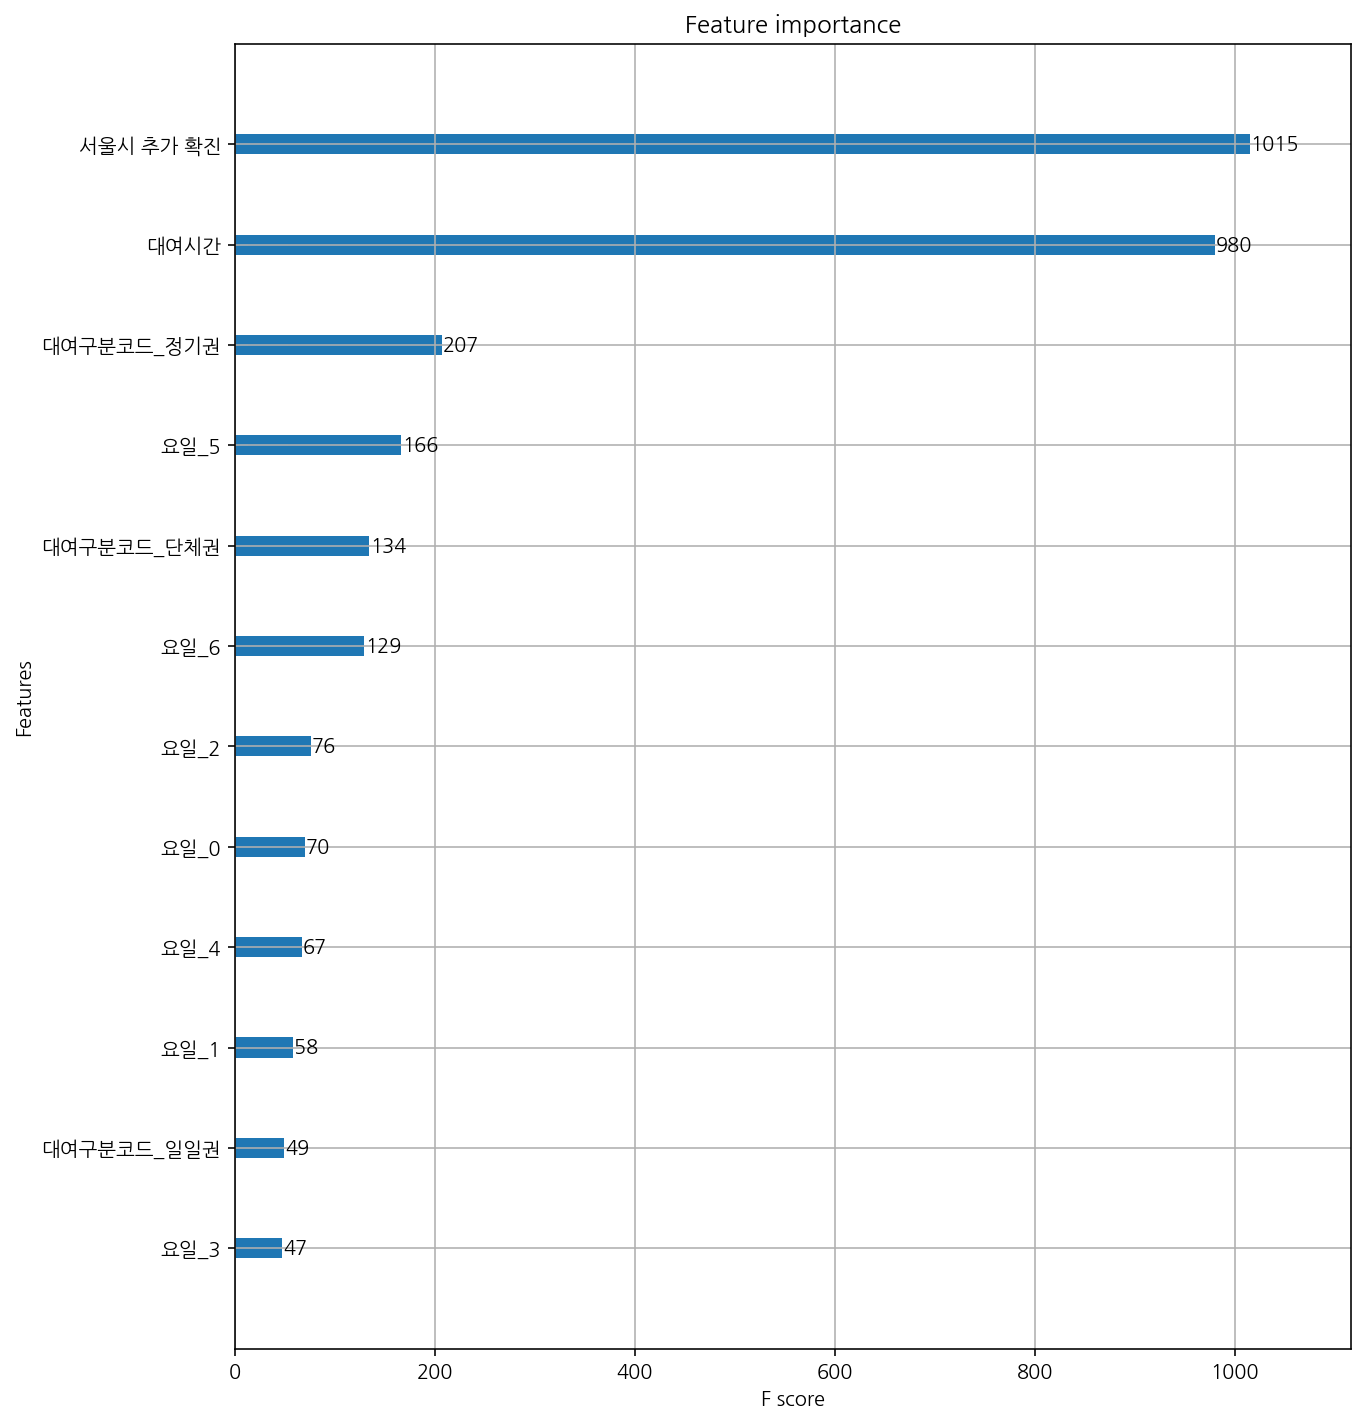

In [55]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

flg, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

SHAP

In [22]:
!pip install shap

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


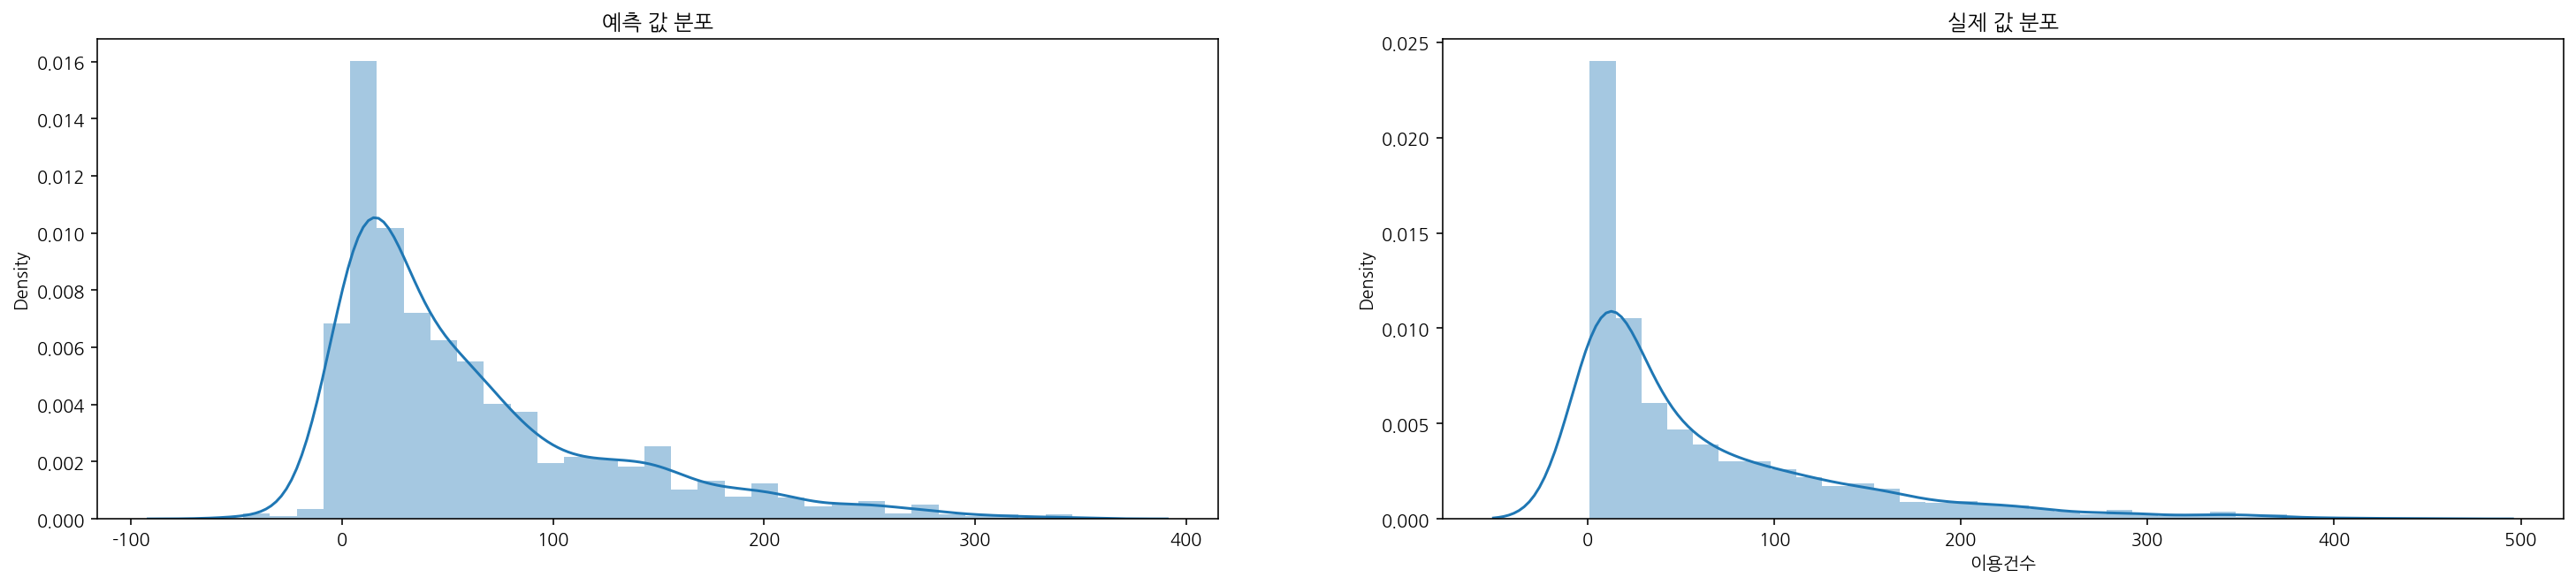

In [56]:
predictions = xgb_model.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(25, 5))
sns.distplot(predictions, ax=axes[0])
axes[0].set_title("예측 값 분포")
sns.distplot(y_test, ax=axes[1])
axes[1].set_title("실제 값 분포")
plt.show()

In [27]:
row = X_test.iloc[[1]]
row

,대여시간,서울시 추가 확진,대여구분코드_단체권,대여구분코드_일일권,대여구분코드_정기권,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6
38418,6,2,0,0,1,0,0,0,0,0,1,0


In [28]:
y_test.iloc[[1]]

38418    17
Name: 이용건수, dtype: int64

In [29]:
xgb_model.predict(row)

array([27.87075], dtype=float32)

In [30]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

In [31]:
!pip install pdpbox

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


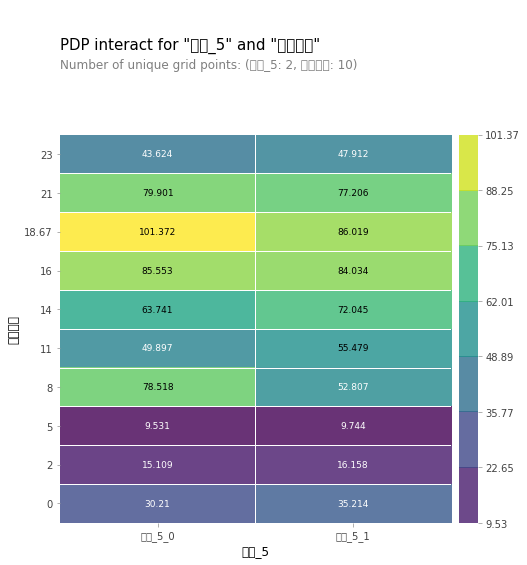

In [34]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['요일_5', '대여시간']

interaction = pdp_interact(
    model=xgb_model, 
    dataset=X_val,
    model_features=X_val.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

----------------------------------------------------------

이용건수의 합계가 가장 많은 강서구와 영등포구, 송파구 데이터를 통해 예측

In [32]:
top3 = ['강서구','영등포구','송파구']
df_top3 = df_1[df_1['소재지(자치구)'].isin(top3)]
df_top3.shape

(24172, 7)

In [33]:
df_top3_onehot = pd.get_dummies(data = df_top3, columns = ['대여구분코드','요일','소재지(자치구)'], prefix = ['대여구분코드','요일','소재지(자치구)'])
print(df_top3_onehot.shape)
df_top3_onehot.head()

(24172, 17)


,날짜,대여시간,서울시 추가 확진,이용건수,대여구분코드_단체권,대여구분코드_일일권,대여구분코드_정기권,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6,소재지(자치구)_강서구,소재지(자치구)_송파구,소재지(자치구)_영등포구
148,2020-07-01,0,9,12,0,1,0,0,0,1,0,0,0,0,1,0,0
149,2020-07-01,0,9,46,0,0,1,0,0,1,0,0,0,0,1,0,0
150,2020-07-01,1,9,9,0,1,0,0,0,1,0,0,0,0,1,0,0
151,2020-07-01,1,9,30,0,0,1,0,0,1,0,0,0,0,1,0,0
152,2020-07-01,2,9,12,0,0,1,0,0,1,0,0,0,0,1,0,0


In [34]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_top3_onehot, test_size=0.2, random_state=2)
train.shape,test.shape

((19337, 17), (4835, 17))

In [35]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=2)
train.shape, val.shape,test.shape

((15469, 17), (3868, 17), (4835, 17))

In [36]:
target = '이용건수'
features = df_top3_onehot.drop(columns=[target,'날짜']).columns

In [37]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [38]:
xgb_model = xgboost.XGBRegressor(n_estimators=100,gamma=0, max_depth=5)

xgb_model.fit(X_train,y_train)
print("validation sets accuracy : ",xgb_model.score(X_val,y_val))  #0.819697613350705
print("test sets accuracy : ",xgb_model.score(X_test,y_test))  #0.8076096413890779

[03:58:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
validation sets accuracy :  0.819697613350705
test sets accuracy :  0.8076096413890779


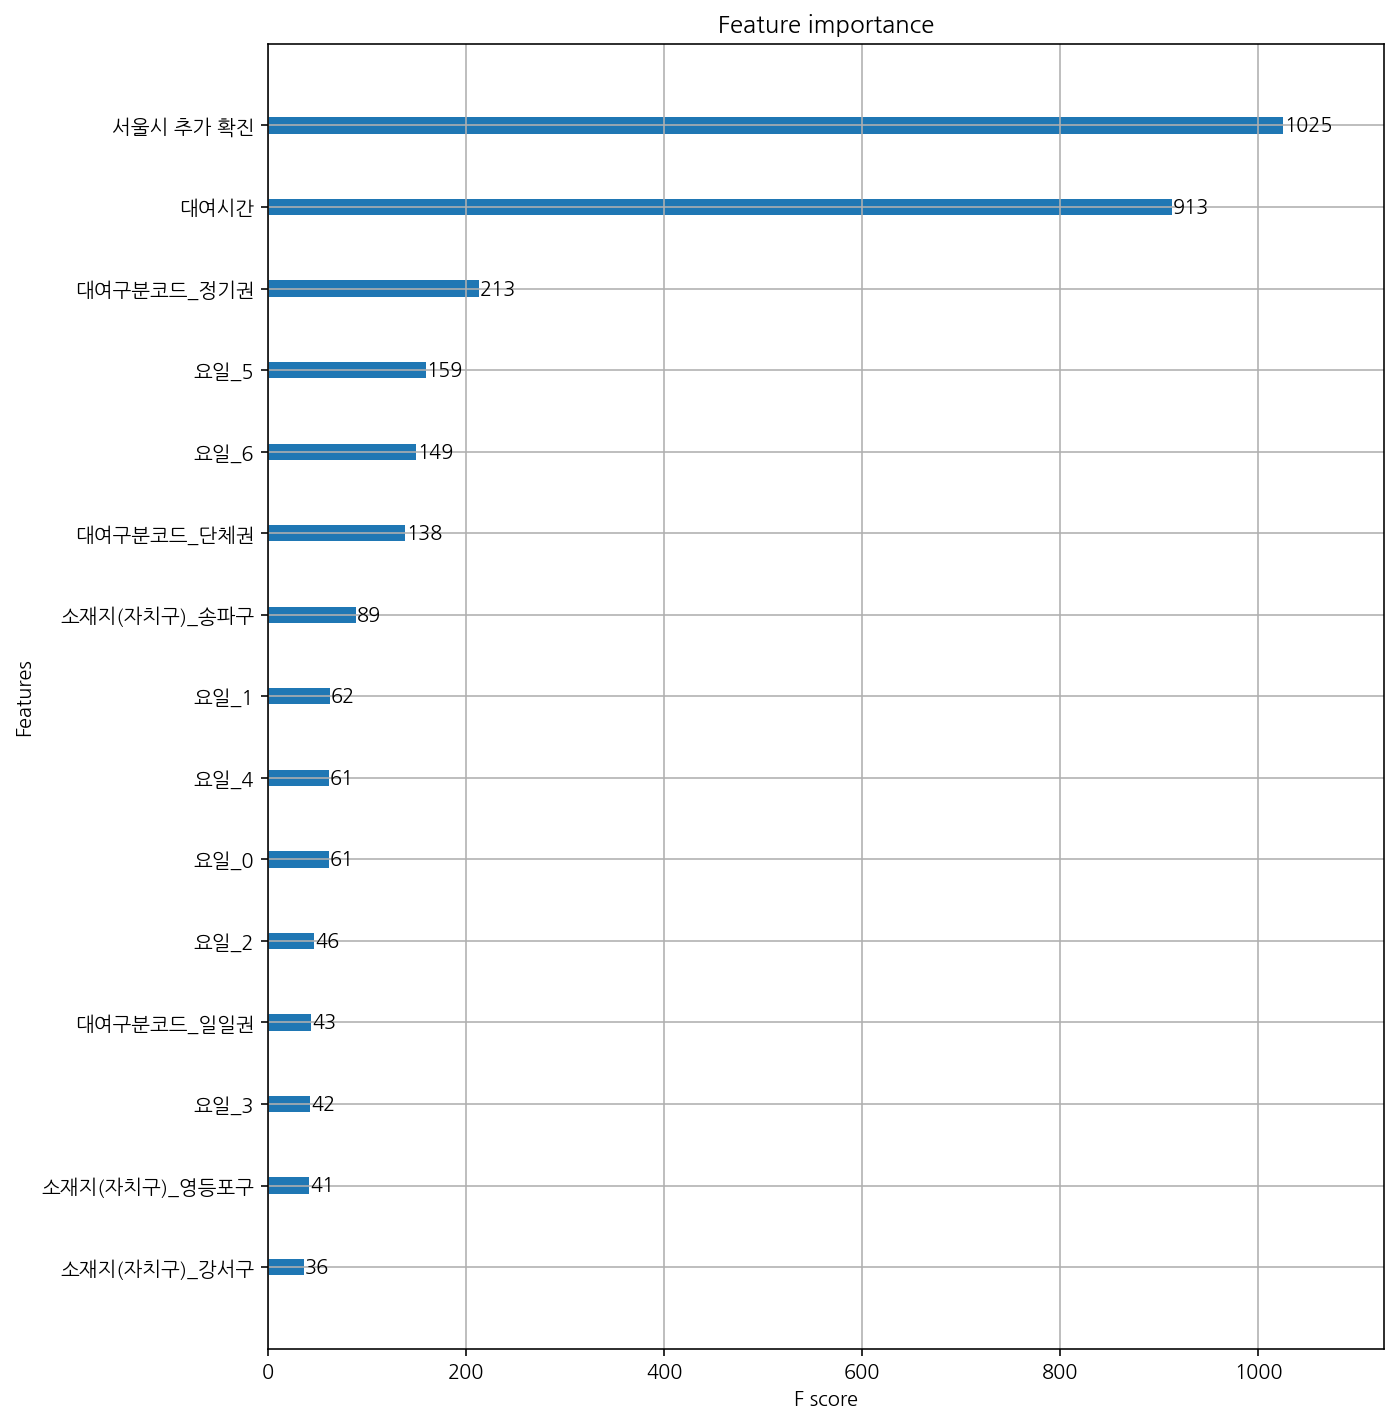

In [70]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

flg, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

In [39]:
predictions = xgb_model.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(25, 5))
sns.distplot(predictions, ax=axes[0])
axes[0].set_title("예측 값 분포")
sns.distplot(y_test, ax=axes[1])
axes[1].set_title("실제 값 분포")
plt.show()

NameError: ignored

In [67]:
row = X_test.iloc[[1]]
row

,대여시간,서울시 추가 확진,대여구분코드_단체권,대여구분코드_일일권,대여구분코드_정기권,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6,소재지(자치구)_강서구,소재지(자치구)_송파구,소재지(자치구)_영등포구
87183,8,50,0,1,0,0,0,0,0,0,1,0,0,0,1


In [68]:
y_test.iloc[[1]]

87183    7
Name: 이용건수, dtype: int64

In [69]:
xgb_model.predict(row)

array([-4.365308], dtype=float32)

In [70]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


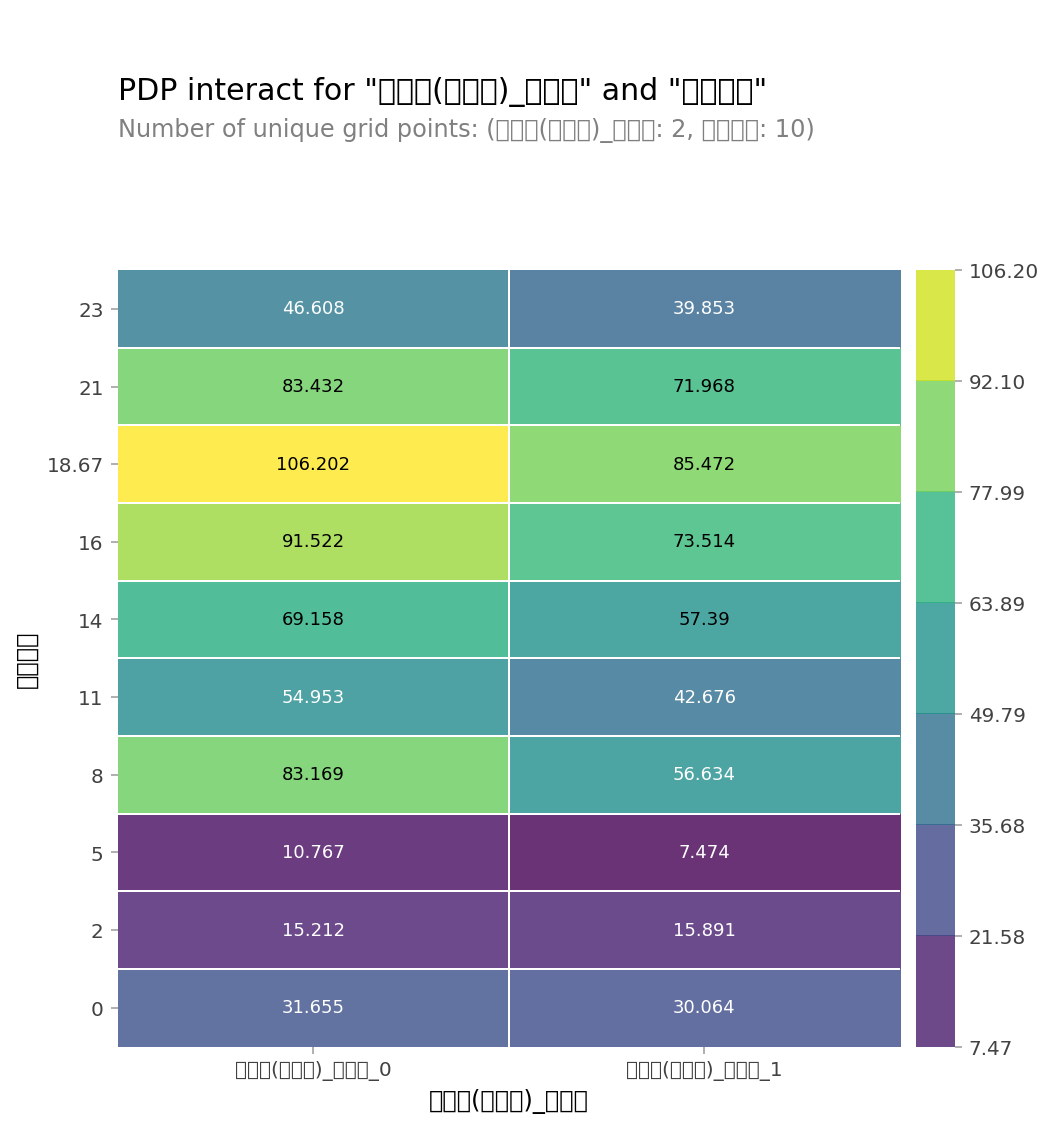

In [78]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['소재지(자치구)_송파구', '대여시간']

interaction = pdp_interact(
    model=xgb_model, 
    dataset=X_val,
    model_features=X_val.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


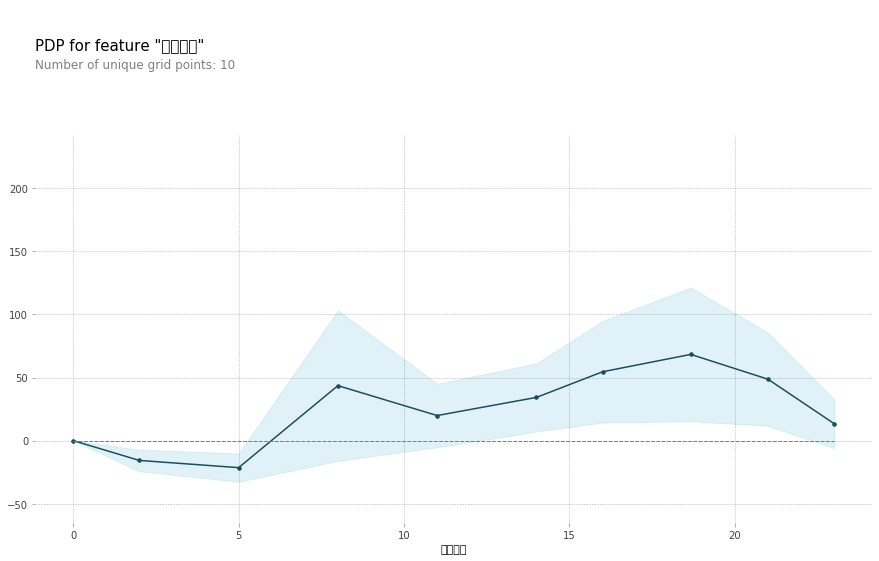

In [71]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = '대여시간'

isolated = pdp_isolate(
    model=xgb_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


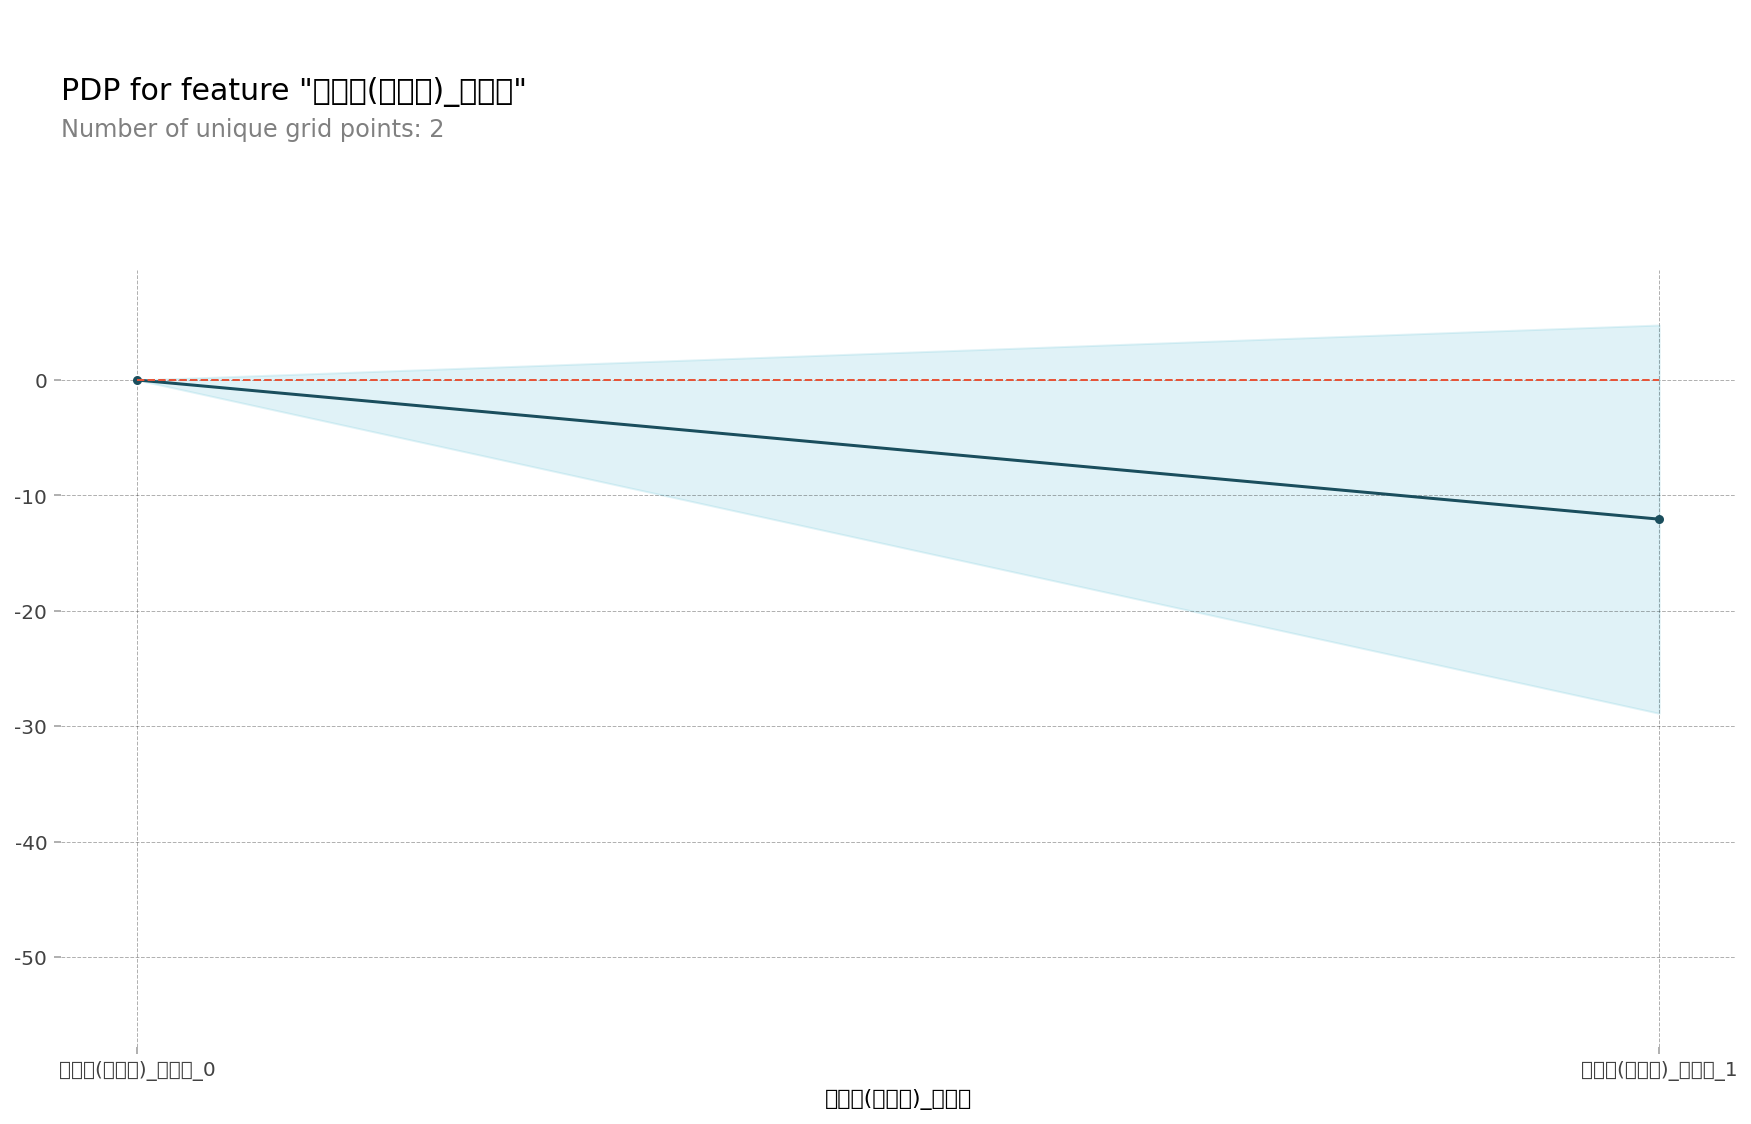

In [80]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = '소재지(자치구)_송파구'

isolated = pdp_isolate(
    model=xgb_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

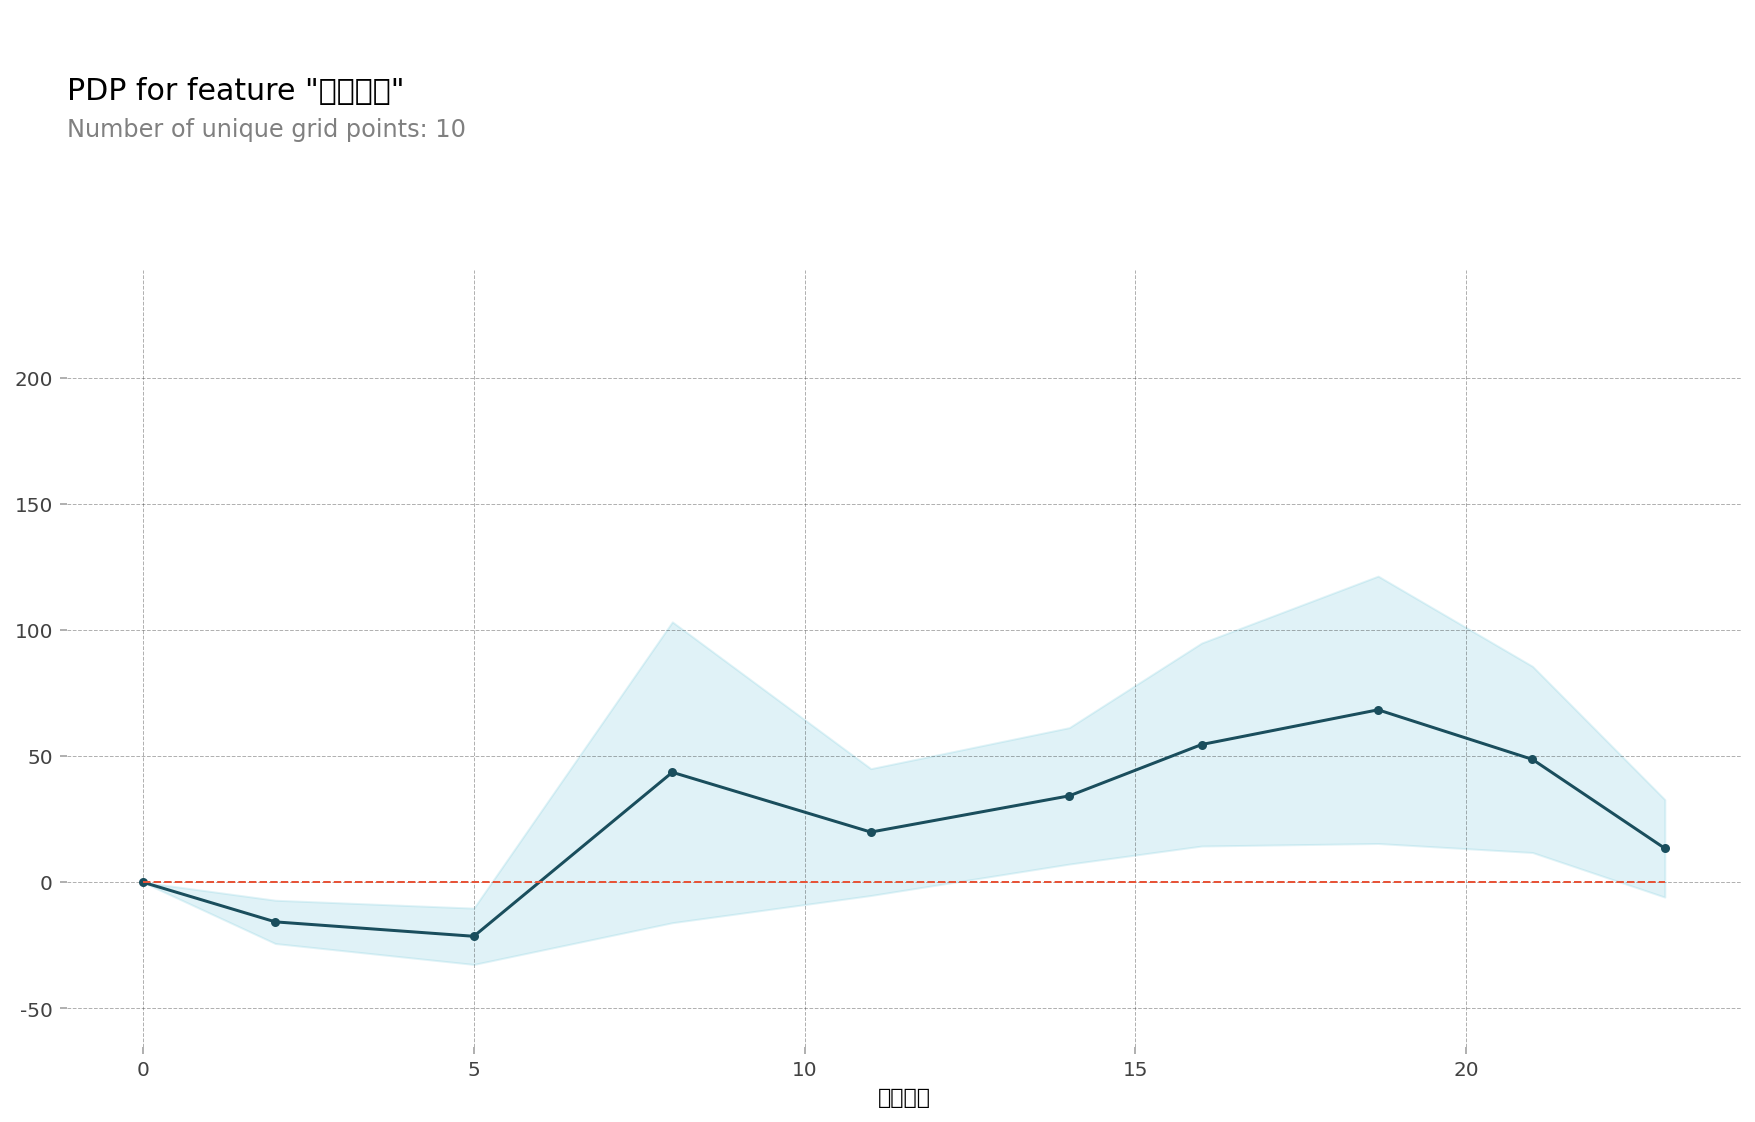

In [81]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = '대여시간'

isolated = pdp_isolate(
    model=xgb_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

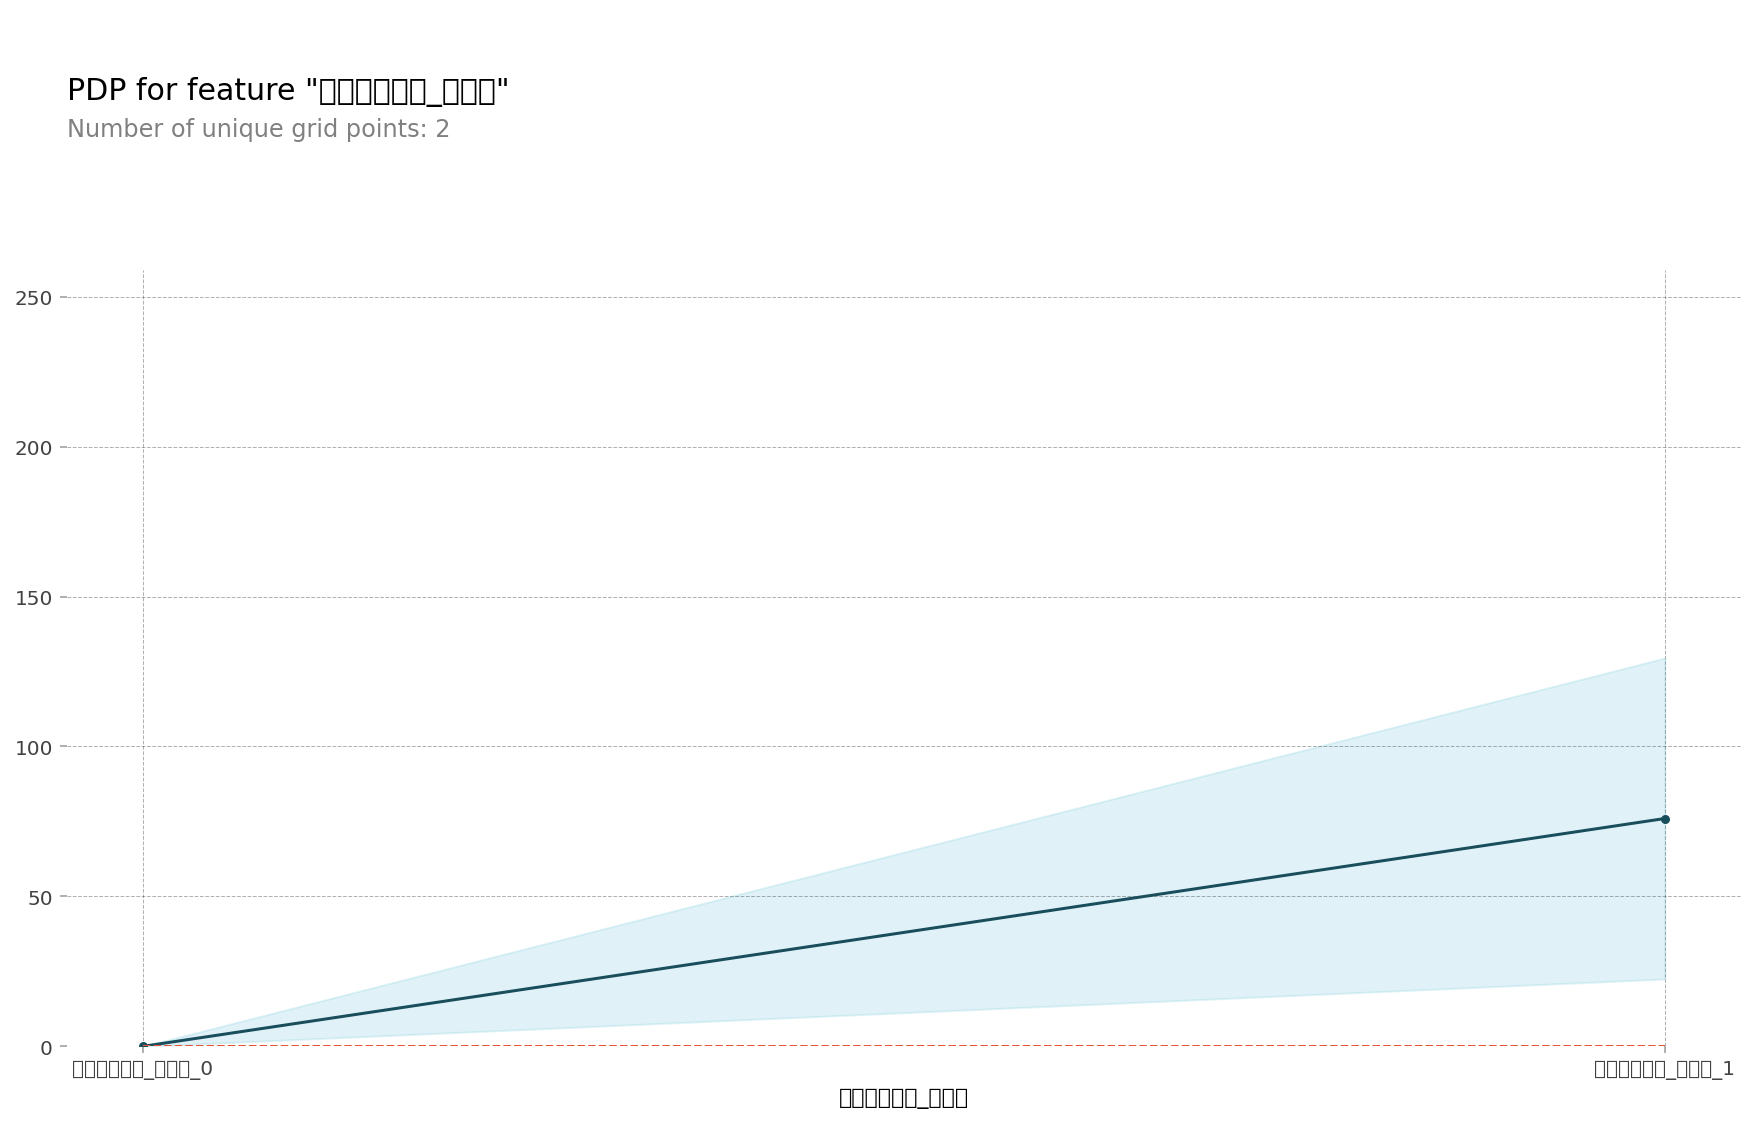

In [82]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = '대여구분코드_정기권'

isolated = pdp_isolate(
    model=xgb_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

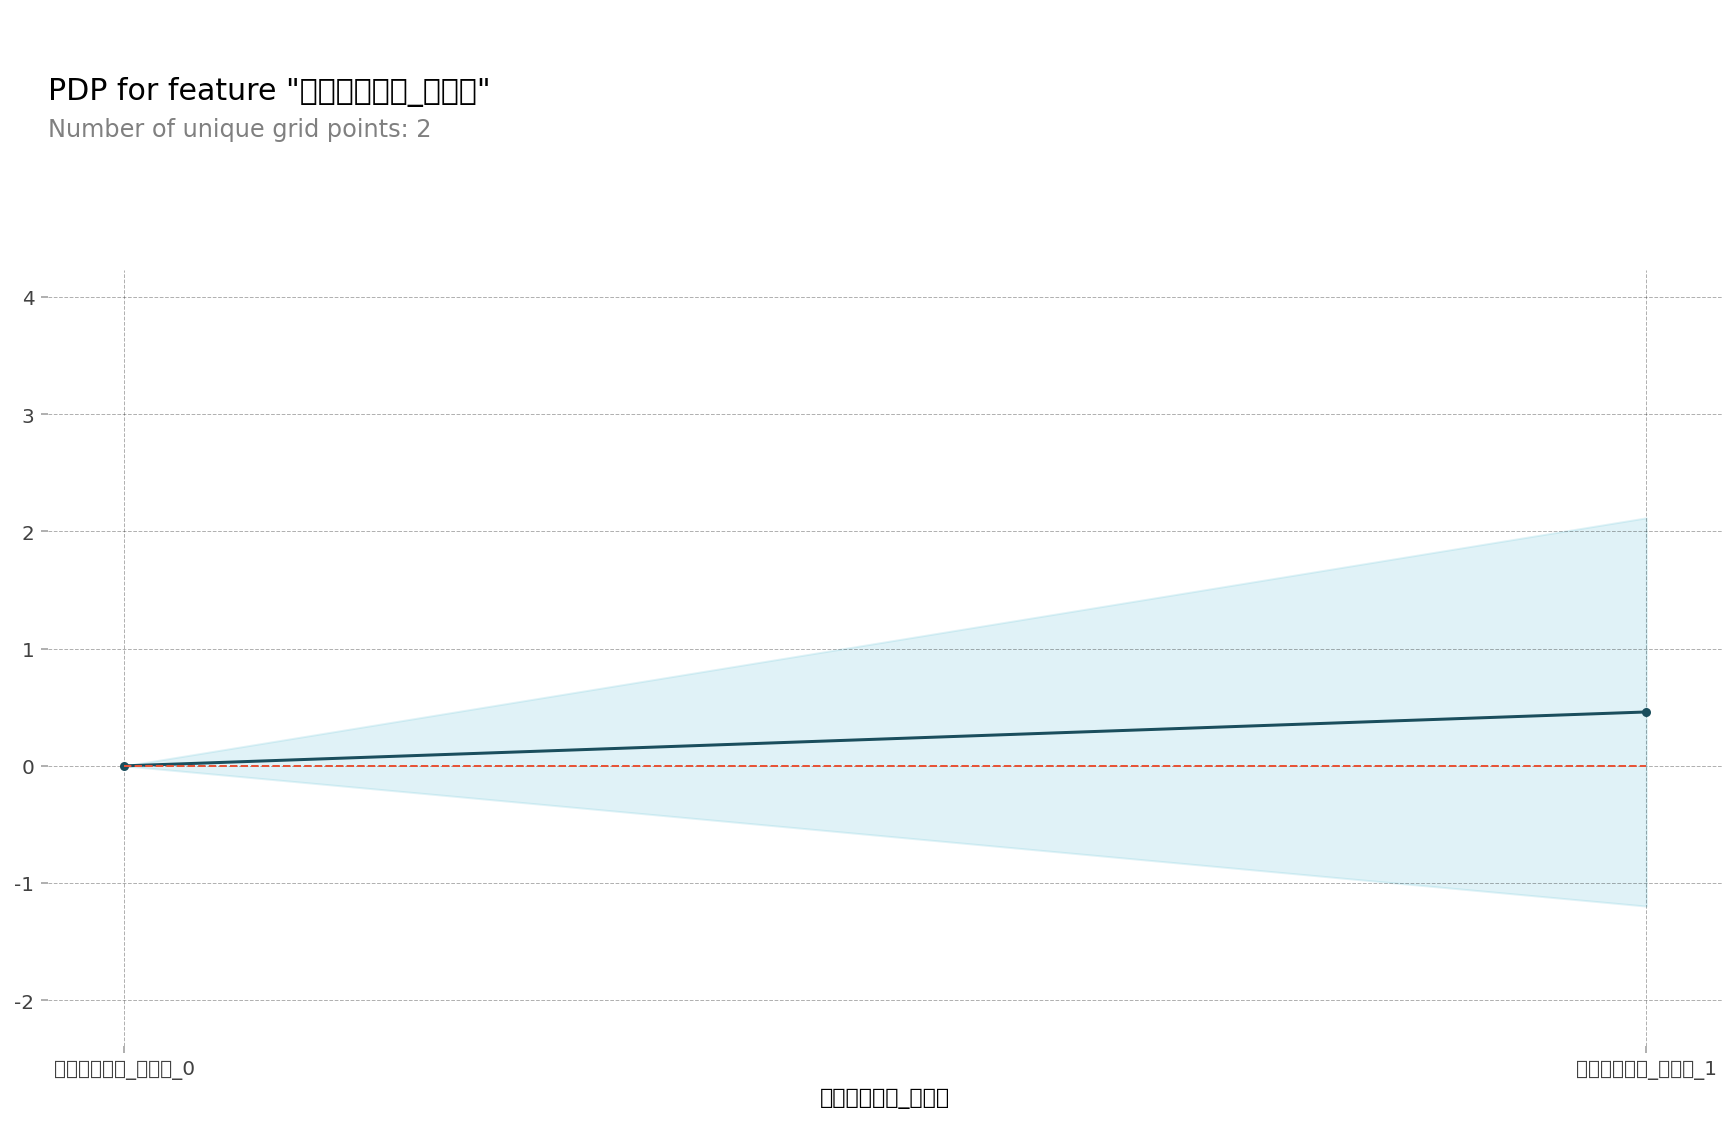

In [83]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = '대여구분코드_일일권'

isolated = pdp_isolate(
    model=xgb_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

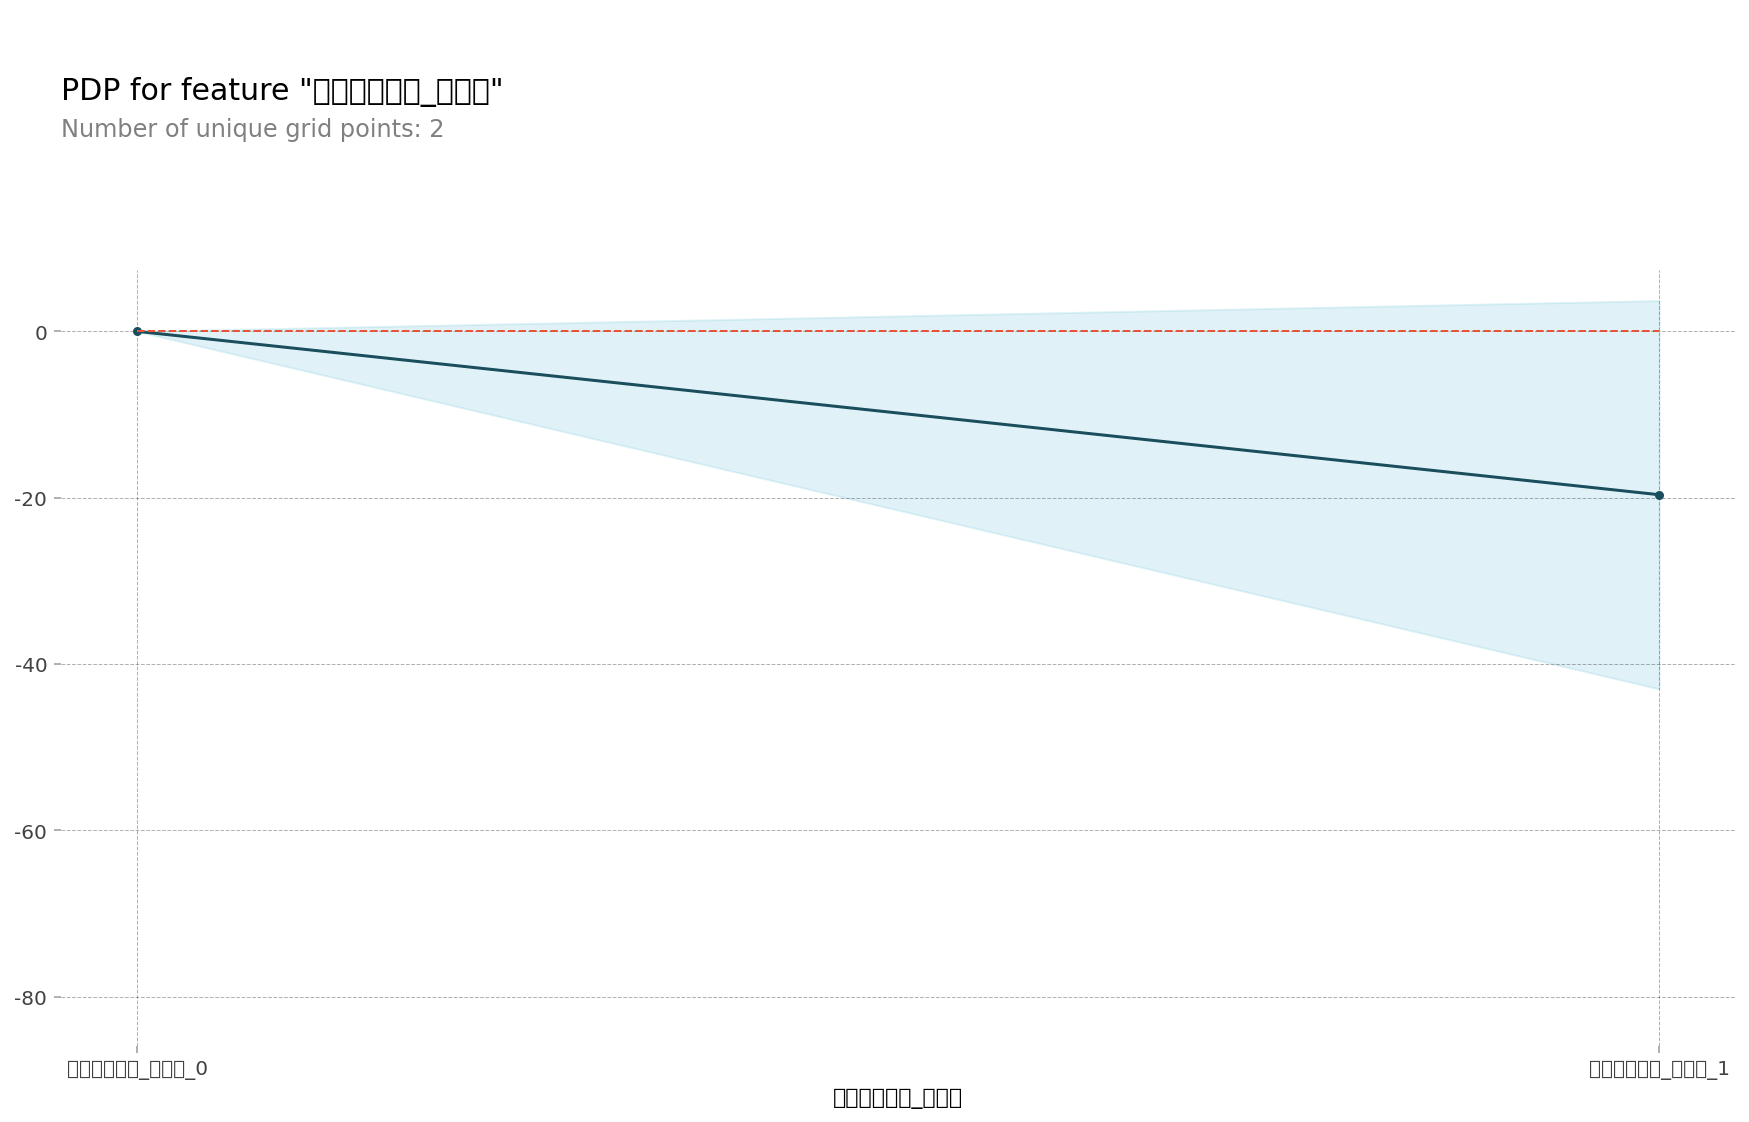

In [84]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = '대여구분코드_단체권'

isolated = pdp_isolate(
    model=xgb_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);